# Convert OHLC data using csv from MT4 and Plot Renko

In [91]:
import pandas as pd
from stocktrends import Renko
import numpy as np

## Input the filename
Read only the first five cols (Fetch only daily TF)

In [92]:
# Read CSV, strip out the time 00:00, sort to DESC
data = pd.read_csv('SPX500m.lmx_1440.csv', usecols=[0,1,2,3,4])
data['date'] = data['date'].str.split(' ').str[0]
df = data.sort_index(ascending=False)

n_data = pd.read_csv('SPX500m.lmx_60.csv', usecols=[0,1,2,3,4])
n_data['date'] = n_data['date'].str.split(' ').str[0]
n_df = n_data.sort_index(ascending=False)
adj_close = n_df.iloc[-1]['close']

## Create Renko Func

In [93]:
# Function to convert ohlc data into renko bricks. Pass dataframe name and brick size
def df_to_renko(data, n):
    #Reset index on the dataframe, convert column names to lower case
    data.reset_index(inplace=True)
    data.columns = [i.lower() for i in data.columns]
    #Print out any null values in dataframe
    print(data.isnull().values.any())
    #Call renko function and pass dataframe
    df = Renko(data)
    #Assign brick size
    df.brick_size = n
    #Convert to renko and pass to renko_df
    renko_df = df.get_ohlc_data()
    return renko_df

## Create Renko Chart Func

In [94]:
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams["figure.figsize"] = (18,9)

In [95]:
# create the figure
def plot_renko(num, new_df, step, adj_close):
    fig = plt.figure(1)
    fig.clf()
    axes = fig.gca()
    #The number of bars to plot on graph, get the list of entries
    num_bars = num
    df = new_df.tail(num_bars)
    #Get the min and max close to be used on the graph's y start and end coordinates
    min_y = min(new_df.close.tail(num_bars))
    max_y = max(new_df.close.tail(num_bars))
    #Get the close of the last entry (aka, last renko price)
    lp = df.iloc[-1]['close']
    #Get the last known actual closing price
    adj_close = adj_close
    #Zip function, for open and close values, plot rectangles using a loop
    #plot the bars, green for 'up', red for 'down'
    renkos = zip(df['open'],df['close'])
    #counter
    index = 1
    #If open < close, i.e: bearish, get the index & open price, color it and add the rectangle patch
    #If open > close, i.e: bullish, get the index & open price, color it and add the rectangle patch
    for open_price, close_price in renkos:
        if (open_price < close_price):
            renko = matplotlib.patches.Rectangle((index,open_price), 1, 
                                                 close_price-open_price, 
                                                 edgecolor='black', 
                                                 facecolor='green', 
                                                 alpha=0.5)
            axes.add_patch(renko)
        else:
            renko = matplotlib.patches.Rectangle((index,open_price), 1, 
                                                 close_price-open_price, 
                                                 edgecolor='black', 
                                                 facecolor='red', 
                                                 alpha=0.5)
            axes.add_patch(renko)
        index = index + 1
    #adjust the axes. Move x-axis by 5 bars to the right
    plt.xlim([0, num_bars+5])
    #Set the graph to the min price and max price + 100 to the topside
    plt.yticks(np.arange(min_y, max_y+100, step=step))
    #Format the chart. Give it a title, print the renko box size, last renko close price and actual close price
    plt.title('Renko Chart SPX.lmx size {0}. Last Close:{1}. Adj Close:{2}. Levels: {3}'.format(size, lp, adj_close, step))
    #Format chart to plot the min and max y-values, aka. price
    plt.ylim([min(min(df['open']),min(df['close'])-50), max(max(df['open']),max(df['close'])+50)])
    plt.grid(True, which='both')
    #Plot the last actual close with a dashed line
    plt.axhline(adj_close, color='blue',ls='--',lw=0.95, label=adj_close)
    #Add any additional horizontal lines that you want here.
    plt.axhline(4590,color='black',ls='-',lw=0.5, label='4590 - Retracement')
    plt.legend()
    return plt.show()

-----------------------------------------------------------------------------------------------------
## Create new df (r_bars) which reads from df_to_renko func.
-----------------------------------------------------------------------------------------------------
Output the number of renko entries

In [96]:
size = 20 #Renko box size
r_bars = df_to_renko(df, size)
print('# of rows in DF:',len(r_bars))
new_df = r_bars[['open','close']]

False
# of rows in DF: 899


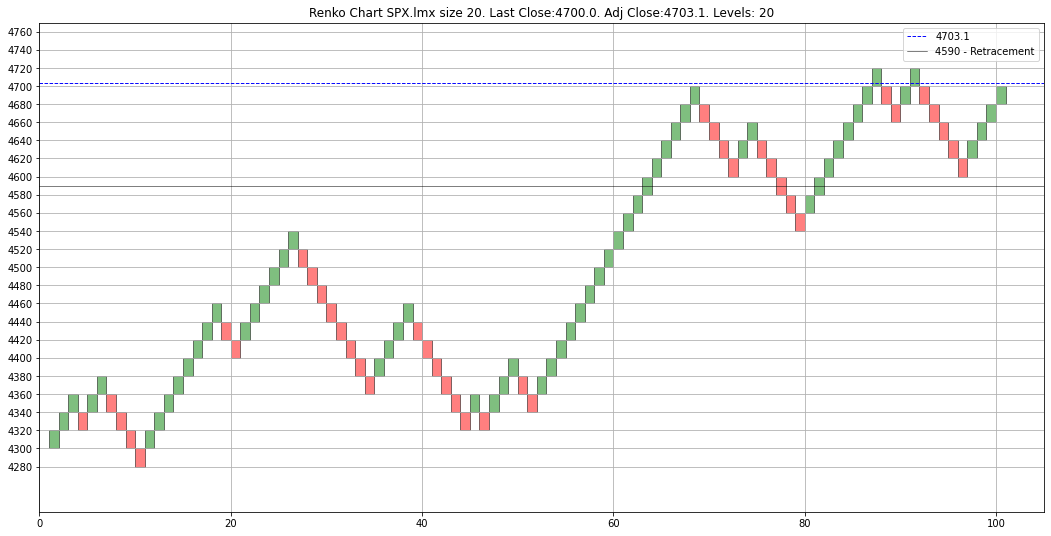

In [97]:
plot_renko(100, new_df, 20, adj_close)

In [98]:
size= 10 #Renko box size
n_bars = df_to_renko(n_df, size)
print('# of rows in DF:',len(n_bars))
df_n = n_bars[['open','close']]

False
# of rows in DF: 549


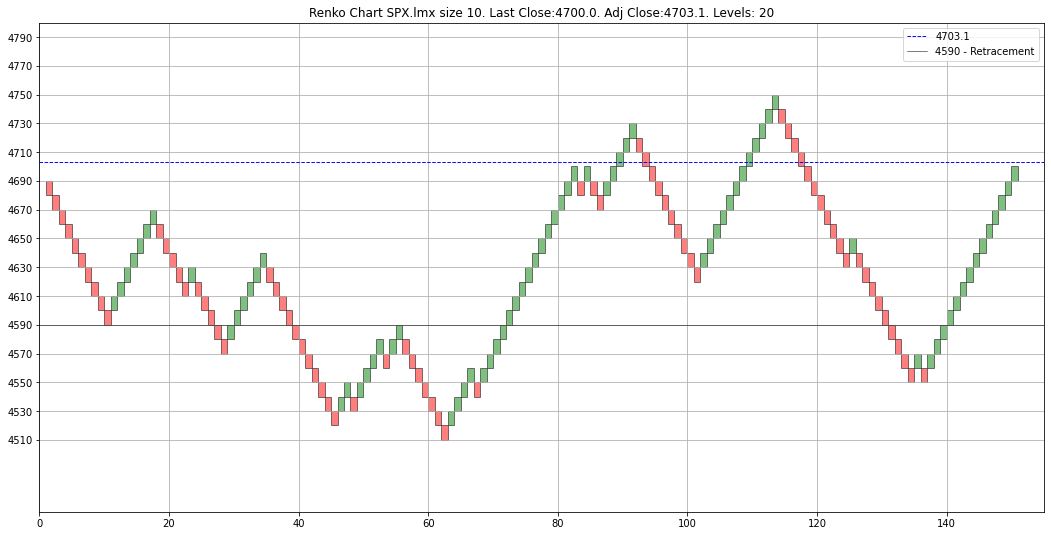

In [99]:
plot_renko(150, df_n, 20, adj_close)